In [1]:
import os
import google.generativeai as genai
import cv2
from typing import Optional
from IPython.display import display, clear_output
from PIL import Image


In [2]:
# Provide the API key.
genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))


In [3]:
image_path = input("Enter image path or type 'camera': ").strip()

camera_index = 0
continuous_stream = False
frame_width = None  # e.g. 1280
frame_height = None  # e.g. 720
cap: Optional[cv2.VideoCapture] = None

if image_path.lower() != "camera":
    if not os.path.isfile(image_path):
        raise SystemExit("Invalid path! Exiting...")


In [4]:
def open_camera(index: int = 0, width: Optional[int] = None, height: Optional[int] = None) -> cv2.VideoCapture:
    camera = cv2.VideoCapture(index)
    if not camera.isOpened():
        raise RuntimeError(f"Unable to open camera index {index}")
    if width:
        camera.set(cv2.CAP_PROP_FRAME_WIDTH, width)
    if height:
        camera.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
    return camera


def capture_frame(camera: cv2.VideoCapture) -> Image.Image:
    if camera is None:
        raise RuntimeError("Camera has not been initialized.")
    ok, frame = camera.read()
    if not ok:
        raise RuntimeError("Failed to capture frame from camera.")
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return Image.fromarray(rgb_frame)


def show_frame(pil_image: Image.Image) -> None:
    clear_output(wait=True)
    display(pil_image)


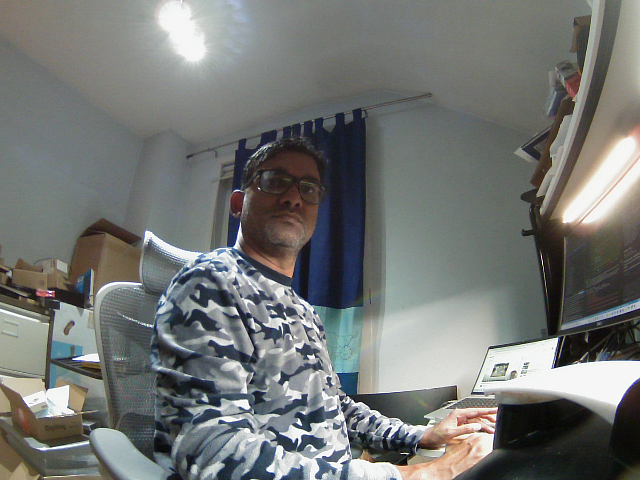

In [5]:
if image_path.lower() == "camera":
    cap = open_camera(camera_index, frame_width, frame_height)
    current_image = capture_frame(cap)
    show_frame(current_image)
else:
    current_image = Image.open(image_path)
    display(current_image)


In [ ]:
model = genai.GenerativeModel("gemini-2.5-pro")


In [ ]:
try:
    while True:
        prompt = input("Ask something: ")
        if prompt.lower() in ("exit", "quit", "bye"):
            print("Exiting...")
            break

        if image_path.lower() == "camera" and continuous_stream:
            current_image = capture_frame(cap)
            show_frame(current_image)

        response = model.generate_content([prompt, current_image])
        print("\n" + (response.text or ""))
        print("-" * 100)
finally:
    if cap is not None:
        cap.release()


### Usage Notes
- Ensure `opencv-python` is installed: `pip install opencv-python`.
- Enter `camera` at the prompt to capture a frame from the UVC camera.
- Set `continuous_stream = True` in the configuration cell to refresh the frame before each question.
- Leave the flag `False` to reuse the initial still frame.
- Adjust `camera_index`, `frame_width`, and `frame_height` if your device requires different settings.
- The camera resource is released automatically when you exit the loop.
